In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Explorative Data Analysis

## Preprocessing

In [3]:
credit_data = pd.read_csv("/content/drive/MyDrive/IE517_project_data/MLF_GP1_CreditScore.csv")
credit_data.shape

(1700, 28)

In [4]:
credit_data.columns

Index(['Sales/Revenues', 'Gross Margin', 'EBITDA', 'EBITDA Margin',
       'Net Income Before Extras', 'Total Debt', 'Net Debt', 'LT Debt',
       'ST Debt', 'Cash', 'Free Cash Flow', 'Total Debt/EBITDA',
       'Net Debt/EBITDA', 'Total MV', 'Total Debt/MV', 'Net Debt/MV',
       'CFO/Debt', 'CFO', 'Interest Coverage', 'Total Liquidity',
       'Current Liquidity', 'Current Liabilities', 'EPS Before Extras', 'PE',
       'ROA', 'ROE', 'InvGrd', 'Rating'],
      dtype='object')

### Separate X and Y

In [5]:
# Seperate Data
X = credit_data.drop(columns = ["InvGrd","Rating"])
y = credit_data[["InvGrd", "Rating"]]
print(y.columns)

Index(['InvGrd', 'Rating'], dtype='object')


In [6]:
print("Dataframe shape is:", credit_data.shape)

Dataframe shape is: (1700, 28)


In [7]:
# Check whether there is null values
credit_data.isnull().sum().sum()

0

In [8]:
y["Rating"].nunique()

16

### Label Encoding Reponse

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y["Rating"])
y["Rating"] = label_encoder.transform(y["Rating"])
y

,InvGrd,Rating
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1695,0,15
1696,0,15
1697,0,15
1698,0,15


### Overview of Features

In [10]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

In [11]:
# Targets are not balance but still acceptable. Not an extreme situation.
np.mean(credit_data["InvGrd"])

0.7570588235294118

### Correlation Matrix Heat Plot for Features
From correlation matrix plot we could tell that most of the features are not highly correlated. Only few of them have correlation higher than 0.6.

<AxesSubplot:>

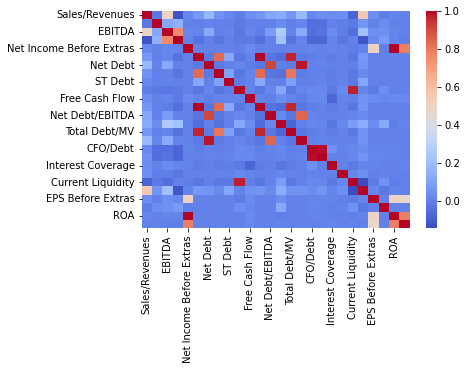

In [12]:
##EDA 03:Coefficient&heatmap
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm')

## Split Train and Test Data
We will fit tune our model only based on the training dataset. We use test data for the final measurement of model performance.

In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# "data" is part of the dataset that we will used to fit and select models
data = pd.concat([X_train, y_train], axis=1)
data

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
228,0.051153,0.009513,0.009719,-0.039417,0.043306,-0.081896,-0.098199,-0.005713,-0.477641,-0.042780,...,0.169148,0.486044,-0.119223,0.086789,0.041667,-0.135278,-0.004420,-0.005427,1,1
1540,0.079824,0.005758,0.120793,0.037950,0.496423,0.109375,0.113158,0.145528,-0.336177,-0.077419,...,0.109136,-0.429234,-0.100276,0.025414,0.535714,-0.497838,0.382071,0.233542,1,14
1010,0.104464,0.000007,0.121539,0.015460,0.211941,0.117657,-0.540550,-0.225255,98.403519,0.538786,...,0.100761,-0.022369,-0.221309,0.976117,0.209302,-0.006053,0.122702,0.069820,1,12
779,0.132708,-0.786051,0.032300,-0.088646,-0.060162,0.136337,0.085602,0.134280,0.445498,0.614543,...,-0.110692,0.627053,0.485570,0.086816,-0.088665,1.571777,-0.178594,-0.270701,0,10
286,-0.072122,-0.034358,-0.128965,-0.061261,0.012561,0.111454,0.101815,-0.104462,2.386702,0.185884,...,-0.148130,-6.630044,-0.220575,0.521486,0.012193,0.066909,-0.099472,0.015987,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.455629,0.017785,-0.547656,-0.169054,-1.831508,0.107761,0.246248,0.417830,-0.948027,-0.034455,...,-0.444315,0.744217,0.462160,-0.339645,-1.773519,-1.800414,-1.951884,-1.943257,0,9
905,0.009625,-0.011626,-0.023721,-0.033022,1.667963,-0.026977,-0.026541,-0.019923,-0.337005,-0.115967,...,0.299860,-0.398990,-0.078155,-0.041056,1.855263,-0.646266,1.634425,1.713981,0,11
1096,0.018212,0.041144,0.147425,0.126901,0.119355,-0.314328,-0.187545,-0.343146,-0.280645,-0.589623,...,0.797171,0.387755,-0.536410,-0.114784,0.127139,-0.043454,0.228856,0.091574,1,12
235,0.055637,0.032434,0.063642,0.007584,0.049386,1.326256,2.386784,0.591562,7.786836,-0.899195,...,-0.164205,-4.919003,-0.932673,0.497253,0.113772,0.766830,-0.105733,0.084815,1,1


In [14]:
data["InvGrd"].sum() / data.shape[0]

0.75

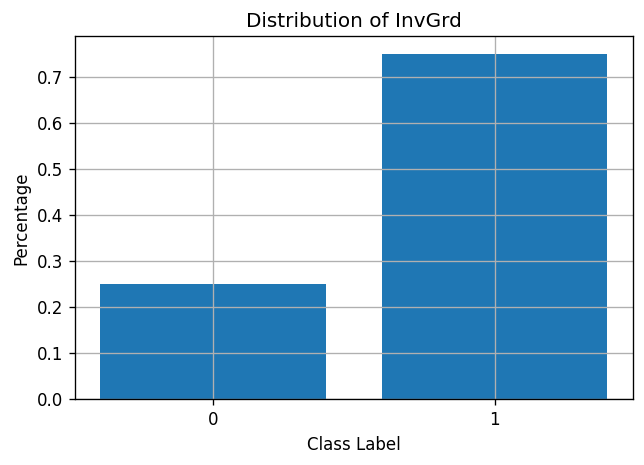

In [15]:
plt.figure(dpi=120)
plt.bar([0, 1], [0.25, 0.75])
plt.grid()
plt.xlabel("Class Label")
plt.ylabel("Percentage")
plt.xticks([0, 1])
plt.title("Distribution of InvGrd")
plt.show()

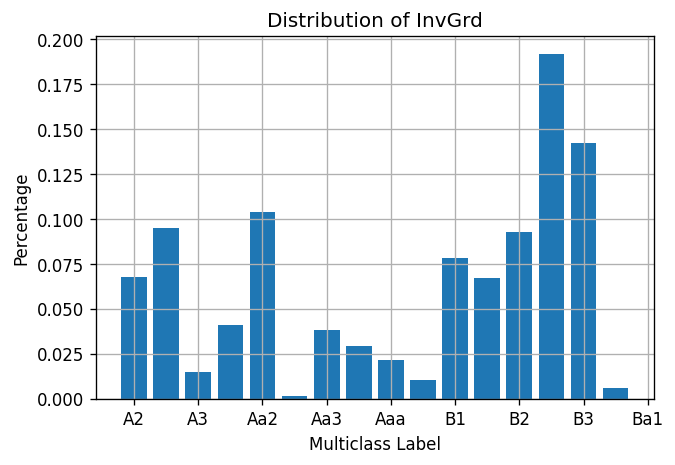

In [16]:
plt.figure(dpi=120)
ax = plt.axes()
ax.bar(list(range(16)), data.groupby("Rating").count()["InvGrd"]/data.shape[0])
ax.grid()
ax.set_xlabel("Multiclass Label")
ax.set_ylabel("Percentage")
# plt.xticks(credit_data["Rating"].unique())
plt.title("Distribution of InvGrd")
ax.set_xticklabels(credit_data["Rating"].unique())
plt.show()

In [17]:
data.groupby("Rating").count()["InvGrd"]

Rating
0      92
1     129
2      20
3      56
4     141
5       2
6      52
7      40
8      29
9      14
10    106
11     91
12    126
13    261
14    193
15      8
Name: InvGrd, dtype: int64

# Feature Engineering

### Outlier Detection
We utilize boxplot to have a quick view of potential outliers. From the following grid of box plots, we can see there are many outliers in each features.

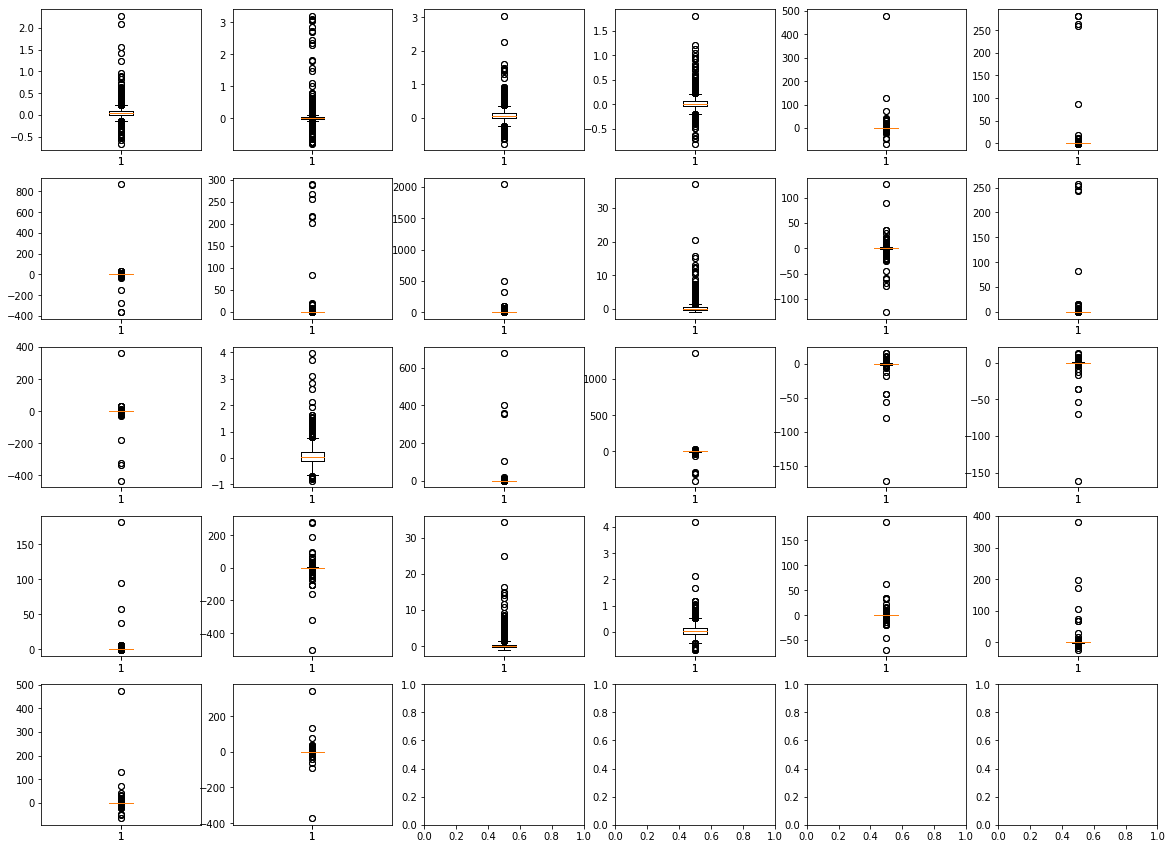

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
for i, feature in enumerate(data.drop(columns=["InvGrd", "Rating"])):
  row = i // 6
  col = i % 6
  axes[row, col].boxplot(data[feature])
  axes[row, col].boxplot(data[feature])
plt.show()

## Winsorize Outliers
Winsorize data that is outer than 95% percent of original data

In [19]:
from scipy.stats.mstats import winsorize

def winsorize_outliers(X_train):
  pct_95 = np.percentile(X_train, 95, axis=0)

  # list of boolean
  outlier_cols = np.any(X_train > pct_95, axis=0).tolist()

  if np.any(outlier_cols):
    X_winsorized = X_train.copy()
    X_winsorized.loc[:, outlier_cols] = winsorize(X_train.loc[:, outlier_cols].values, limits=(0, 0.05))
    X_winsorized = pd.DataFrame(X_winsorized, columns=X_train.columns)
    return X_winsorized
  else:
    return X_train

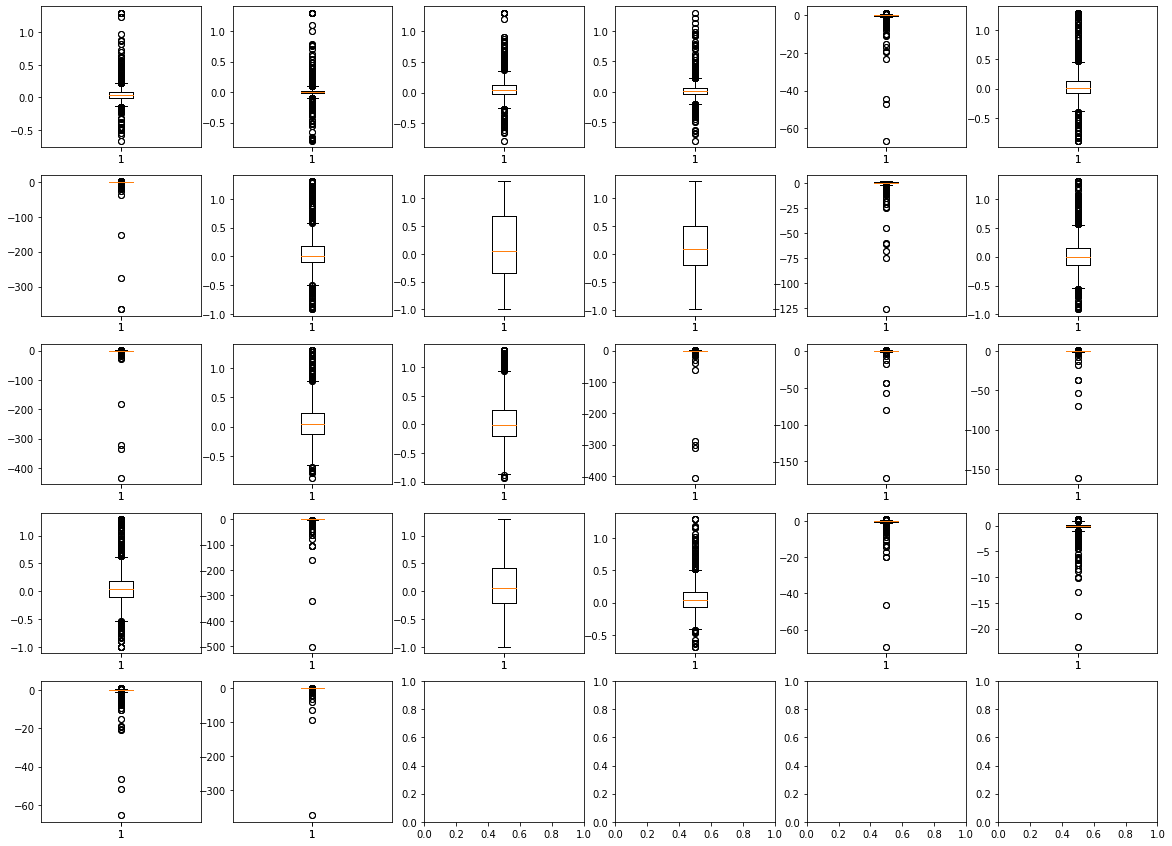

In [20]:
X_winsorized = winsorize_outliers(data.drop(columns=["InvGrd", "Rating"]))
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
for i, feature in enumerate(X_winsorized):
  row = i // 6
  col = i % 6
  axes[row, col].boxplot(X_winsorized[feature])
  axes[row, col].boxplot(X_winsorized[feature])
plt.show()

## Feature Extraction
After examine the data, we found features have been already well scaled. To be honest, since all features are numeric, well scaled and have relative low crrelation, there is less room for feature engineering. Thus, we probably will give the LDA and PCA models a try. Then move on to the model fitting and evaluation process.

### Linear Discriminant Alayasis (for binary classification)
We use LDA model to create a single factor as linear combination of original ones as a new feature. After we fit this LDA model on our training data, we could apply it to our validate data to extract a new feature.

In [21]:
##LDA InvGrd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def generate_LDA_feature(X, lda):
  new_X = X.copy()
  new_X["LDA_feature"] = lda.transform(X).flatten()
  return new_X


### Principle Components Analysis (for multiclass classification)

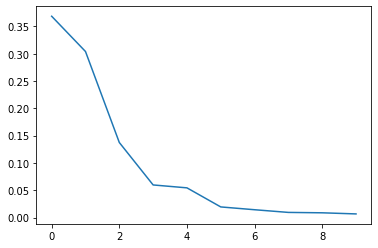

In [22]:
from sklearn.decomposition import PCA
# PCA model for rating target. Since there are too many categoreis in the target, we might not have sufficient data to conduct well-fit LDA
# Thus, we decide to use PCA to extract new features.
PCA_R = PCA(n_components=10)
PCA_R.fit(X_train)
plt.plot(PCA_R.explained_variance_ratio_)

In [23]:
# The followings are the extracted PCA features, remember to add it back.
# PCA_R.transform(X_train)[:, :4]

## Feature Selection
For binary classification task, we plan to fit logistic regression, KNN, and randomforest model. <br> Thus, we could use L1 regularization to select features, or use feature importance.<br>

# Model Fitting and Hyperparameters Tuning

## Define Cross Validation Methods.

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
# input data is training set
def cross_val(model, data, target, metric):
  kf = KFold(n_splits=10, shuffle=True, random_state=42)
  X = data.drop(columns=["Rating", "InvGrd"])
  y = data[["Rating", "InvGrd"]]
  scores = cross_val_score(logi, X, y[target], cv=kf, scoring=metric)
  print(metric + ' scores:', scores)
  print('Mean ' + metric + ' score:', scores.mean())


## Logistic Regression

### Binary classification

In [25]:
from sklearn.linear_model import LogisticRegression

# Baseline model: directly fit the logistic regression
logi = LogisticRegression(solver='liblinear')

cross_val(logi, data, "InvGrd", 'roc_auc')

roc_auc scores: [0.5667686  0.66836735 0.54785691 0.69706735 0.67156863 0.60851761
 0.6740682  0.640625   0.71932921 0.76960784]
Mean roc_auc score: 0.6563776710665256


In [26]:
# Model 1: winsorize outlier
winsorized_data = pd.concat([winsorize_outliers(data.drop(columns=["Rating", "InvGrd"])), data[["InvGrd", "Rating"]]], axis=1)
cross_val(
    LogisticRegression(solver='liblinear'),
    winsorized_data,
    "InvGrd",
    "roc_auc"
)

roc_auc scores: [0.65511383 0.71294307 0.64034805 0.71672575 0.76989619 0.68987169
 0.7060534  0.74270833 0.72756693 0.81978085]
Mean roc_auc score: 0.7181008099660208


In [27]:
# Model 2: Add LDA features
def LDA_model():
  lda = LinearDiscriminantAnalysis()
  logi = LogisticRegression(solver='liblinear', penalty="l1")

  kf = KFold(n_splits=10, shuffle=True, random_state=42)
  auc_scores = []
  X = data.drop(columns=["Rating", "InvGrd"])
  y = data[["InvGrd", "Rating"]]

  for train_idx, val_idx in kf.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    lda.fit(X_train, y_train["InvGrd"])

    X_train_new = generate_LDA_feature(X_train, lda)
    X_val_new = generate_LDA_feature(X_val, lda)

    logi.fit(X_train_new, y_train["InvGrd"])
    y_pred_proba = logi.predict_proba(X_val_new)[:, 1]
    auc_score = roc_auc_score(y_val["InvGrd"], y_pred_proba)
    auc_scores.append(auc_score)

  print('AUC scores:', auc_scores)
  print('Mean AUC score:', np.mean(auc_scores))

LDA_model()

AUC scores: [0.562691131498471, 0.6702470461868958, 0.5562359007412181, 0.6980341604898486, 0.6583044982698962, 0.6093366093366094, 0.6716891356066613, 0.6190104166666666, 0.7243306854957341, 0.7465397923875432]
Mean AUC score: 0.6516419376679544


#### Summary
From the above three models we could tell that, using LDA to extract features and selection features with l1 norm is not a good way for this binary classification problem. <br>
However, winsorizing outliers turns out significantly increase more than 0.06 the cross validation model auc. Thus, we will still try this method in the following model fitting.
Besides, through testting we also find out that L1 regularization's feature selection is really bad.

### Multiclassification

In [28]:
cross_val(LogisticRegression(solver='liblinear', multi_class="multinomial"),
          data,
          "Rating",
          "accuracy")

accuracy scores: [0.25       0.20588235 0.24264706 0.25       0.25       0.16911765
 0.21323529 0.19117647 0.17647059 0.22794118]
Mean accuracy score: 0.2176470588235294


In [29]:
cross_val(
    LogisticRegression(solver='liblinear', multi_class="multinomial"),
    pd.concat([winsorize_outliers(data.drop(columns=["Rating", "InvGrd"])), data[["InvGrd", "Rating"]]], axis=1),
    "Rating",
    "accuracy"
)

accuracy scores: [0.26470588 0.19117647 0.25       0.30147059 0.22058824 0.19852941
 0.30147059 0.25       0.20588235 0.26470588]
Mean accuracy score: 0.2448529411764706


## KNN

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def knn_grid_search(X, y, metric):
  param = {"n_neighbors": range(1, 11)}

  # Define knn model
  knn = KNeighborsClassifier()

  cv = 10

  grid_search = GridSearchCV(knn, param, cv=cv, n_jobs=-1,  scoring=metric)
  grid_search.fit(X, y)
  print("Best parameter setting: %s" % grid_search.best_params_)
  print("Best cross-validation " + metric + " : %0.2f" % grid_search.best_score_)

### Grid Search on Original Data

In [31]:
# KNN model grid search for best number of neighbors.
knn_grid_search(data.drop(columns=["InvGrd", "Rating"]), data["InvGrd"], 'roc_auc')

Best parameter setting: {'n_neighbors': 4}
Best cross-validation roc_auc : 0.75


### Grid Search on Winsorized Data

In [32]:
# KNN model grid search for best number of neighbors.
knn_grid_search(winsorized_data.drop(columns=["InvGrd", "Rating"]), winsorized_data["InvGrd"], 'roc_auc')

Best parameter setting: {'n_neighbors': 4}
Best cross-validation roc_auc : 0.80


### Grid Search on Winsorized Data for Multiclassification

In [33]:
# KNN model grid search for best number of neighbors.
knn_grid_search(winsorized_data.drop(columns=["InvGrd", "Rating"]), winsorized_data["Rating"], 'accuracy')

Best parameter setting: {'n_neighbors': 1}
Best cross-validation accuracy : 0.51


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

def rf_grid_search(X, y, metric):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [1, 5, 10]
    }

    # Define knn model
    rf = RandomForestClassifier()

    cv = 5

    grid_search = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1,  scoring=metric)
    grid_search.fit(X, y)
    print("Best parameter setting: %s" % grid_search.best_params_)
    print("Best cross-validation " + metric +  " score: %0.2f" % grid_search.best_score_)

### Grid Search on Original Data

In [35]:
rf_grid_search(data.drop(columns=["InvGrd", "Rating"]), data["InvGrd"], "roc_auc")

Best parameter setting: {'max_depth': 10, 'n_estimators': 200}
Best cross-validation roc_auc score: 0.89


In [36]:
rf_grid_search(data.drop(columns=["InvGrd", "Rating"]), data["InvGrd"], "accuracy")

Best parameter setting: {'max_depth': 10, 'n_estimators': 200}
Best cross-validation accuracy score: 0.86


### Grid Search on Winsorized Data

In [37]:
rf_grid_search(winsorized_data.drop(columns=["InvGrd", "Rating"]), data["InvGrd"], "roc_auc")

Best parameter setting: {'max_depth': 10, 'n_estimators': 300}
Best cross-validation roc_auc score: 0.89


In [38]:
rf_grid_search(winsorized_data.drop(columns=["InvGrd", "Rating"]), data["InvGrd"], "accuracy")

Best parameter setting: {'max_depth': 10, 'n_estimators': 200}
Best cross-validation accuracy score: 0.86


### Grid Search on Winsorized Data for Multiclassification

In [39]:
rf_grid_search(data.drop(columns=["InvGrd", "Rating"]), data["Rating"], "accuracy")

Best parameter setting: {'max_depth': 10, 'n_estimators': 300}
Best cross-validation accuracy score: 0.55


# Ensembling
Combine previous three model with best hyperpatameters. Then we found that ensembling method is not as good as random forest model. Probably because random forest is much better than logistic regression and KNN mdoel. Thus, Ensembling method is dragged by those models.

## Ensembling for Binary Classification

In [40]:
from sklearn.ensemble import VotingClassifier

def ensemble_cv(X, y, metric):
    # Define the individual models
    rf = RandomForestClassifier(n_estimators=300, max_depth=10)
    knn = KNeighborsClassifier(n_neighbors=4)
    logreg = LogisticRegression(solver='liblinear')

    # Define the ensemble model
    ensemble = VotingClassifier(estimators=[('rf', rf), ('knn', knn), ('logistic', logreg)], voting='soft')
    # Perform cross-validation and calculate the AUC scores
    auc_scores = cross_val_score(ensemble, X, y, cv=5, scoring=metric)

    # Print the mean AUC score and the standard deviation
    print("Ensemble CV " + metric +  " score: %0.2f (+/- %0.2f)" % (auc_scores.mean(), auc_scores.std() * 2))

In [41]:
ensemble_cv(winsorized_data.drop(columns=["InvGrd", "Rating"]), winsorized_data["InvGrd"], "roc_auc")

Ensemble CV roc_auc score: 0.87 (+/- 0.03)


In [42]:
ensemble_cv(winsorized_data.drop(columns=["InvGrd", "Rating"]), winsorized_data["InvGrd"], "accuracy")

Ensemble CV accuracy score: 0.82 (+/- 0.01)


## Ensembling for Multiclassification

In [43]:
def ensemble_multi_cv(X, y):
    rf = RandomForestClassifier(n_estimators=100, max_depth=10)
    knn = KNeighborsClassifier(n_neighbors=1)
    logreg = LogisticRegression(solver='lbfgs', multi_class="multinomial")
    ensemble = VotingClassifier(estimators=[('lr', logreg), ('knn', knn), ('rf', rf)], voting='hard')
    scores = cross_val_score(ensemble, X, y, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [44]:
ensemble_multi_cv(winsorized_data.drop(columns=["InvGrd", "Rating"]), winsorized_data["Rating"])

Accuracy: 0.53 (+/- 0.06)


# Final Inspection on Testing Set
For binary classification, the test accuracy is slightly lower than cross-validation accuracy, but it's still acceptable. More specifically, in our test set, random forest model's accuracy is equal to esembling model. However, in our cross validation method, random forest's accuracy and auc are both higher than ensembling method. This is becuase random forest model's variance is slightly higher than ensembling model.

## Test Ensemble Model

In [45]:
def test_ensemble_model():
  rf = RandomForestClassifier(n_estimators=300, max_depth=10)
  knn = KNeighborsClassifier(n_neighbors=4)
  logreg = LogisticRegression(solver='liblinear')

  ensemble = VotingClassifier(estimators=[('rf', rf), ('knn', knn), ('logistic', logreg)], voting='soft')
  ensemble.fit(winsorized_data.drop(columns=["InvGrd", "Rating"]), winsorized_data["InvGrd"])

  accuracy = ensemble.score(winsorize_outliers(X_test), y_test["InvGrd"])

  print("Fnial accuracy of ensemble model on test data is:", round(accuracy, 4))

test_ensemble_model()

Fnial accuracy of ensemble model on test data is: 0.8147


## Test Random Forest Model

In [46]:
def test_rf_model():
  rf = RandomForestClassifier(n_estimators=300, max_depth=10)

  rf.fit(winsorized_data.drop(columns=["InvGrd", "Rating"]), winsorized_data["InvGrd"])

  accuracy = rf.score(winsorize_outliers(X_test), y_test["InvGrd"])

  print("Fnial accuracy of random forest model on test data is:", round(accuracy, 4))
  return rf

test_rf = test_rf_model()

Fnial accuracy of random forest model on test data is: 0.8265


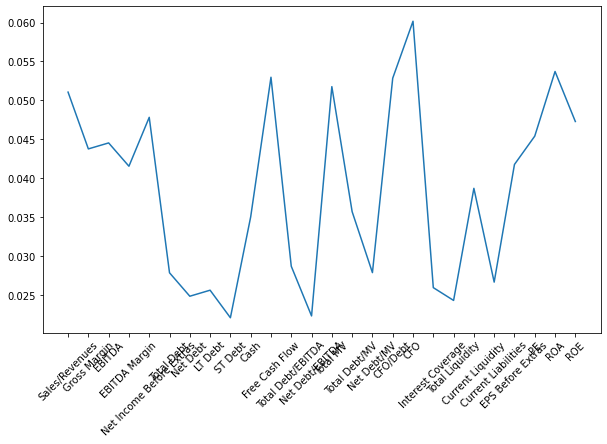

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.columns, test_rf.feature_importances_)
plt.xticks(rotation=45)
plt.show()

## Test Ensemble for Multiclassification

In [48]:
def ensemble_multi_cv():
    rf = RandomForestClassifier(n_estimators=100, max_depth=10)
    knn = KNeighborsClassifier(n_neighbors=1)
    logreg = LogisticRegression(solver='lbfgs', multi_class="multinomial")

    ensemble = VotingClassifier(estimators=[('lr', logreg), ('knn', knn), ('rf', rf)], voting='hard')
    ensemble.fit(winsorized_data.drop(columns=["InvGrd", "Rating"]), winsorized_data["Rating"])

    accuracy = ensemble.score(winsorize_outliers(X_test), y_test["Rating"])

    print("Fnial accuracy of ensemble model on test data is:", round(accuracy, 4))

ensemble_multi_cv()

Fnial accuracy of ensemble model on test data is: 0.5088


## Randome Forest Model for Multiclassification

In [49]:
def test_rf_model_multi():
  rf = RandomForestClassifier(n_estimators=100, max_depth=10)

  rf.fit(winsorized_data.drop(columns=["InvGrd", "Rating"]), winsorized_data["Rating"])

  accuracy = rf.score(winsorize_outliers(X_test), y_test["Rating"])

  print("Fnial accuracy of random forest model on test data is:", round(accuracy, 4))
  return rf

test_rf = test_rf_model_multi()

Fnial accuracy of random forest model on test data is: 0.5206


# Conclusion